# Dict

In [1]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

In [2]:
print(thisdict)

{'brand': 'Ford', 'model': 'Mustang', 'year': 1964}


In [3]:
print(thisdict["brand"])

Ford


In [4]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964,
  "year": 2020
}

In [5]:
print(thisdict)

{'brand': 'Ford', 'model': 'Mustang', 'year': 2020}


In [6]:
print(len(thisdict))

3


In [7]:
thisdict = {
  "brand": "Ford",
  "electric": False,
  "year": 1964,
  "colors": ["red", "white", "blue"]
}

In [8]:
print(thisdict)

{'brand': 'Ford', 'electric': False, 'year': 1964, 'colors': ['red', 'white', 'blue']}


In [9]:
print(type(thisdict))

<class 'dict'>


# pandas

In [10]:
import pandas as pd

## Series objects

### Create a pandas series

In [11]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

### Operations

Pandas series are similar to one-dim NumPy `ndarray`. They can often be passed as parameters to NumPy functions:

In [12]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

In [13]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

In [14]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

### Index labels

In [15]:
s

0    2
1   -1
2    3
3    5
dtype: int64

In [16]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

Access value by label:

In [17]:
s2["bob"]

83

Access value by index (integer location):

In [18]:
s2[1]

83

To make it clear when you are accessing by label or by integer location, it is recommended to always use the loc attribute when accessing by label, and the iloc attribute when accessing by integer location:

In [19]:
s2.loc["bob"]

83

In [20]:
s2.iloc[1]

83

Slicing a Series also slices the index labels:

In [21]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

This can lead to unexpected results when using the default numeric labels, so be careful:

In [22]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [23]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

Oh look! The first element has index label 2. The element with index label 0 is absent from the slice:

In [24]:
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)

Key error: 0


But remember that you can access elements by integer location using the iloc attribute. This illustrates another reason why it's always better to use loc and iloc to access Series objects:

In [25]:
surprise_slice.iloc[0]

1002

### Init from dict
You can create a Series object from a dict. The keys will be used as index labels:

In [26]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68} # create dict
s3 = pd.Series(weights)                                       # init series from dict
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

You can control which elements you want to include in the Series and in what order by explicitly specifying the desired index:

In [27]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

### Automatic alignment
When an operation involves multiple Series objects, pandas automatically aligns items by matching index labels.

In [28]:
print(s2)
print(s3)

print(s2.keys())
print(s3.keys())

s2 + s3

alice       68
bob         83
charles    112
darwin      68
dtype: int64
alice     68
bob       83
colin     86
darwin    68
dtype: int64
Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

### Init with a scalar
You can also initialize a Series object using a scalar and a list of index labels: all items will be set to the scalar.

In [29]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

### Series name
A Series can have a name:

In [30]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

### Plotting a Series

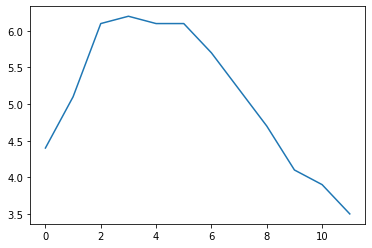

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

## DataFrame objects
A DataFrame object represents a spreadsheet, with cell values, column names and row index labels. You can define expressions to compute columns based on other columns, create pivot-tables, group rows, draw graphs, etc. You can see DataFrames as dictionaries of Series.

### Creating a DataFrame
You can create a DataFrame by passing a dictionary of Series objects:

In [36]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


A few things to note:

* the Series were automatically aligned based on their index,
* missing values are represented as NaN,
* Series names are ignored (the name "year" was dropped),
* DataFrames are displayed nicely in Jupyter notebooks, woohoo!

You can access columns pretty much as you would expect. They are returned as Series objects:

In [37]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [38]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


If you pass a list of columns and/or index row labels to the DataFrame constructor, it will guarantee that these columns and/or rows will exist, in that order, and no other column/row will exist. For example:

In [41]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


Another convenient way to create a DataFrame is to pass all the values to the constructor as an ndarray, or a list of lists, and specify the column names and row index labels separately:

In [42]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


To specify missing values, you can either use np.nan or NumPy's masked arrays:

In [43]:
masked_array = np.ma.asarray(values, dtype=np.object)
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(
        masked_array,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

C:\Users\olsso\anaconda3\envs\DT374B\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,NaN,112


Instead of an ndarray, you can also pass a DataFrame object:

In [44]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3
